# Práctica Guiada 1 - Normalización de features

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing

In [2]:
# Cargamos el dataset de Boston

boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Normalizamos los datos

Veamos el efecto de estandarizar los datos eligiendo un par de variables que tienen una gran diferencia en escala.

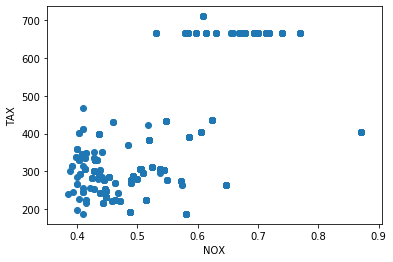

In [4]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX");

### Estandarización

Apliquemos estandarización, transformando las variables para que tengan media 0 $(\mu = 0)$ y desvío estándar 1 $(\sigma = 1)$, aplicando la fórmula:

$$ x' = \frac{x - \mu}{\sigma}$$

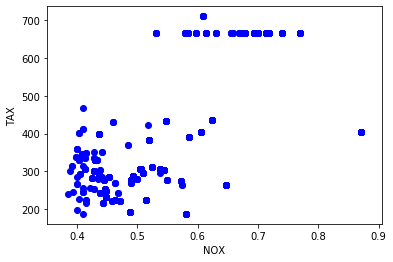

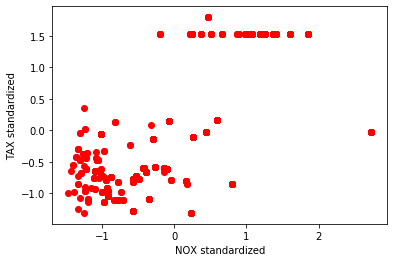

In [5]:
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

# Estandarizamos NOX
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

# Estandarizamos TAX
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()

Si observamos la forma del histograma de una variable individual, vemos que tampoco varía, únicamente cambia la escala en la que la variable está expresada.

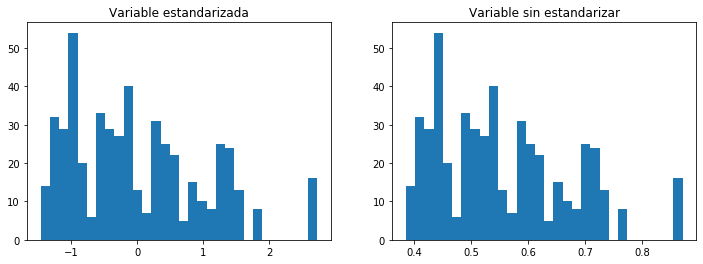

In [6]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax1.set_title("Variable estandarizada")
ax1.hist(xs,bins=30);

ax2 = plt.subplot(122)
ax2.set_title("Variable sin estandarizar")
ax2.hist(df["NOX"],bins=30);

Como pueden ver, no cambiamos la forma de los datos, sino simplemente su escala. 

También podemos usar scikit-learn para estandarizar variables:

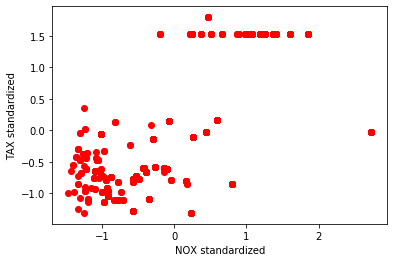

In [7]:
stdscaler = preprocessing.StandardScaler()

xs = stdscaler.fit_transform(df[["NOX"]])
ys = stdscaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized");

### Normalización min - max

Probemos ahora esta otra forma de normalización, aplicando la siguiente fórmula:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

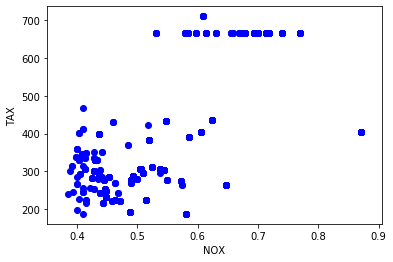

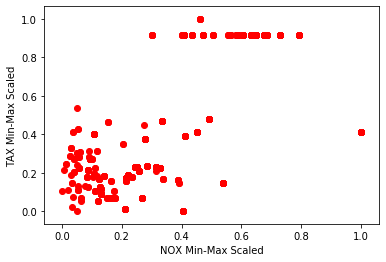

In [8]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["TAX"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled");

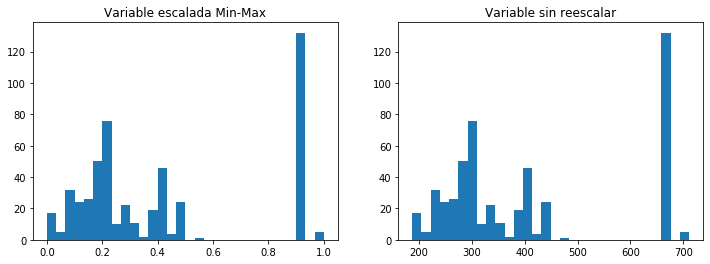

In [9]:
#Verificamos el histógrama de una de las variables reescaladas

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax1.set_title("Variable escalada Min-Max")
ax1.hist(ys,bins=30);

ax2 = plt.subplot(122)
ax2.set_title("Variable sin reescalar")
ax2.hist(df["TAX"],bins=30);

Esta tipo de normalización también se puede lograr usando scikit-learn:

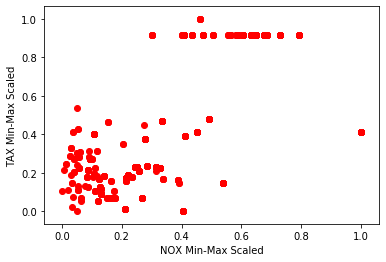

In [10]:
minmaxscaler = preprocessing.MinMaxScaler()

xs = minmaxscaler.fit_transform(df[["NOX"]])
ys = minmaxscaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled");

## Otras formas de normalizar

En algunos casos, normalizamos los datos dividiendo por algún tipo de sumatoria. Por ejemplo, es habitual normalizar diviendo por la sumatoria del valor absoluto x (norma L1):

$|X| = \sum_{}{|x|}$

o por la raíz de la suma de los cuadrados de x (norma L2)

$||X|| = \sqrt{\sum_{}{x^2}}$. 

Aplicaremos una normalización usando la norma L1 y L2 y grafiquen como lo hicimos con los otros métodos de normalización.

Luego, repetiremos el ejercicio, esta vez usando la librería de [scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

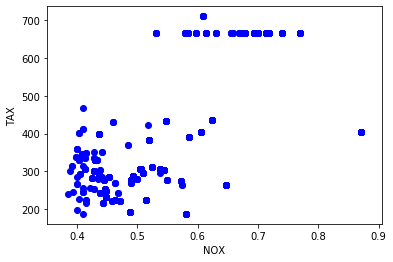

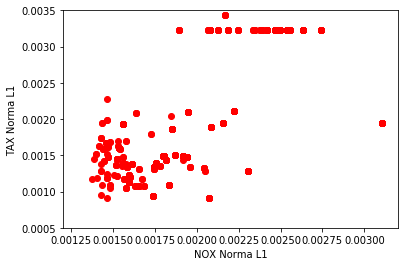

In [11]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

# Normalizar xs e ys con norma L1

df["xs_l1"] = df["NOX"]/np.sum(np.abs(df["NOX"]))
df["ys_l1"] = df["TAX"]/np.sum(np.abs(df["TAX"]))

plt.scatter(df["xs_l1"], df["ys_l1"], color='r')

plt.axis(xmin=0.0012, xmax=0.0032, ymin=0.0005\
         , ymax=0.0035)
plt.xlabel("NOX Norma L1")
plt.ylabel("TAX Norma L1");

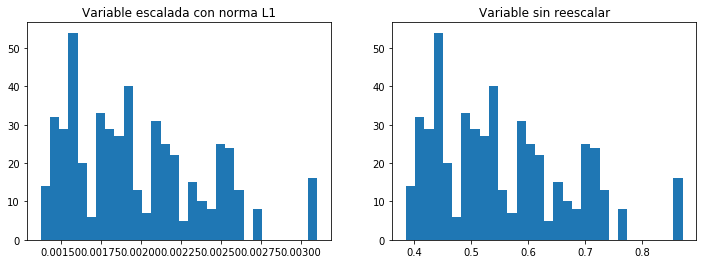

In [12]:
#Verificamos el histógrama de una de las variables reescaladas

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax1.set_title("Variable escalada con norma L1")
ax1.hist(df["xs_l1"],bins=30);

ax2 = plt.subplot(122)
ax2.set_title("Variable sin reescalar")
ax2.hist(df["NOX"],bins=30);

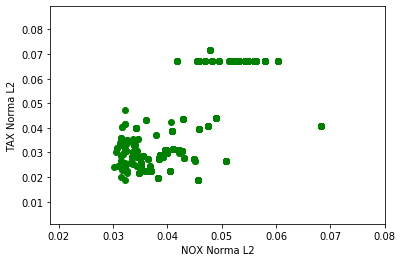

In [13]:
xs = df["NOX"]
ys = df["TAX"]

# Normalizar xs e ys con norma L2

xs_l2 = df["NOX"]/np.sqrt(np.sum(df["NOX"]**2))
ys_l2 = df["TAX"]/np.sqrt(np.sum(df["TAX"]**2))

plt.scatter(xs_l2, ys_l2, color='g')
plt.xlabel("NOX Norma L2")
plt.ylabel("TAX Norma L2");

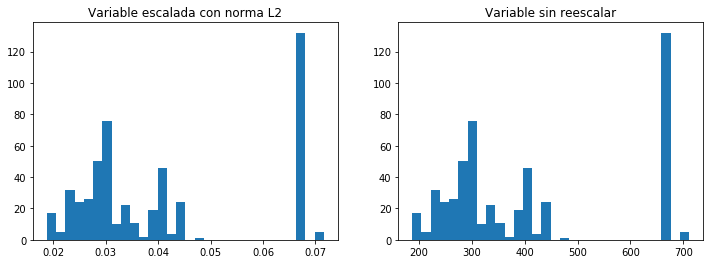

In [14]:
#Verificamos el histógrama de una de las variables reescaladas.

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax1.set_title("Variable escalada con norma L2")
ax1.hist(ys_l2,bins=30);

ax2 = plt.subplot(122)
ax2.set_title("Variable sin reescalar")
ax2.hist(df["TAX"],bins=30);

Esta tipo de normalización también se puede lograr usando scikit-learn:

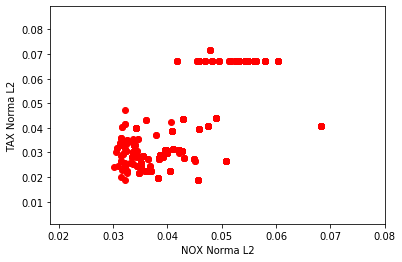

In [15]:
# Usando preprocessing.normalize sobre xs y ys

X = df[["TAX","NOX"]]

X = preprocessing.normalize(X, norm='l2', axis=0)
plt.scatter(X[:,1], X[:,0], color='r')
plt.xlabel("NOX Norma L2")
plt.ylabel("TAX Norma L2");

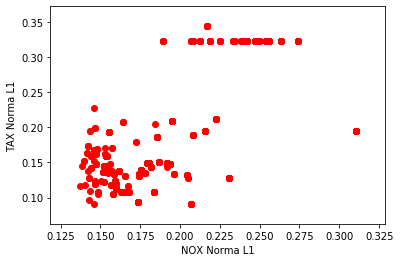

In [16]:
# Usando preprocessing.normalize sobre xs y ys

X = df[["TAX","NOX"]]

X = preprocessing.normalize(X, norm='l1', axis=0)
plt.scatter(X[:,1]*100, X[:,0]*100, color='r')
plt.xlabel("NOX Norma L1")
plt.ylabel("TAX Norma L1");